In [44]:
import pandas as pd
import re

In [45]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from os import listdir, walk
from os.path import isfile, join
from pandas.plotting import parallel_coordinates
from tabulate import tabulate, SEPARATING_LINE


import matplotlib.pyplot as plt
import math


# Generate construction heuristics tables

In [46]:
df = pd.read_csv('analysis_fixed.csv')

In [47]:
df.columns

Index(['Instance_Name', 'Number_Of_Customers', 'Number_Of_Hotels',
       'Objective_Value', 'Sum_of_Trips', 'Penalties', 'Hotel_Fees',
       'Max_Trip_Length', 'Number_Of_Trips', 'Prize', 'Time', 'Trace'],
      dtype='object')

In [38]:
df

,Instance_Name,Number_Of_Customers,Number_Of_Hotels,Objective_Value,Sum_of_Trips,Penalties,Hotel_Fees,Max_Trip_Length,Number_Of_Trips,Prize,Time,Trace
0,eil51_1,50,1,411,334,77,0,334,1,700,17.091059,[4539716582.662857; 5166323759.211429; 5166323...
1,eil51_1,50,1,100423,364,59,100000,199,2,718,14.441229,[199015092727.28397; 199074455775.07062; 19917...
2,berlin52_1,51,10,8022,8022,0,0,8022,1,5100,27.944792,[275831928189.6079; 278345599115.8764; 2905795...
3,berlin52_1,51,10,908864,8864,0,900000,1110,10,5100,15.455588,[280465710293.7861; 298294835240.0966; 3160407...
4,berlin52_1,51,10,1009317,9317,0,1000000,1084,11,5100,27.572247,[281148423111.3191; 314481883314.35144; 347720...
5,berlin52_1,51,10,1009396,9396,0,1000000,1146,11,5100,26.604681,[279506709416.88666; 312815050354.09595; 34604...


In [6]:
table_0 = df[['Instance_Name','Objective_Value','Sum_of_Trips','Penalties','Hotel_Fees','Max_Trip_Length','Number_Of_Trips','Prize']]
#table_1 = df[['Instance_Name','Time','Percentate-of-collected-prizes','procedure-type','alpha','beta','gamma','delta']]

In [7]:
print(tabulate(table_0, headers=table_0.columns, tablefmt='latex'))

\begin{tabular}{rlrrrrrrr}
\hline
    & Instance\_Name   &   Objective\_Value &   Sum\_of\_Trips &   Penalties &   Hotel\_Fees &   Max\_Trip\_Length &   Number\_Of\_Trips &   Prize \\
\hline
  0 & rand\_21         &              4780 &           2474 &         865 &         1441 &               315 &                 8 &   11326 \\
  1 & rand\_21         &              4748 &           2503 &         804 &         1441 &               320 &                 8 &   11546 \\
  2 & rand\_21         &              4715 &           2418 &         856 &         1441 &               310 &                 8 &   11334 \\
  3 & rand\_21         &              4746 &           2498 &         807 &         1441 &               319 &                 8 &   11345 \\
  4 & rand\_21         &              4730 &           2433 &         856 &         1441 &               310 &                 8 &   11334 \\
  5 & rand\_21         &              4701 &           2404 &         856 &         1441 &         

In [27]:
print(tabulate(table_1, headers = table_1.columns, tablefmt='latex'))

\begin{tabular}{rlrrlrrrr}
\hline
    & Instance\_Name   &        Time &   Percentate-of-collected-prizes & procedure-type                   &   alpha &   beta &   gamma &   delta \\
\hline
  0 & test            &   0.0017345 &                         1        & backtracking                     &       1 &   0.2  &    0.2  &     0.2 \\
  1 & rc101\_1         &   0.0307431 &                         1        & insertion-heuristic-sum-of-trips &       1 &   0    &    0    &     0   \\
  2 & pr8\_1           &   0.426633  &                         1        & pure-greedy                      &       1 &   0    &    0    &     0   \\
  3 & eil51\_1         &   1.16948   &                         0.769627 & pure-greedy                      &       2 &  -0.25 &    0.05 &     0.5 \\
  4 & berlin51\_1      &   4.58605   &                         1        & pure-greedy                      &       1 &   0    &    0    &     0   \\
  5 & berlin52\_2      &   3.28675   &                         0.7

In [7]:
def generate_local_search_df(data):
    bests = []
    neighborhoods = []
    step_functions = []
    times = []
    max_trip_lengths = []
    number_of_trips = []
    prizes = []
    traces = []


    for instance in instances:
        val = data['Instance_Name'] == instance
 
        df_instance = data[val]

        v = df_instance['Objective_Value']
        t = df_instance['Time']

        best_rows_bools = df_instance['Objective_Value'] == min(v)

        best_rows = df_instance[best_rows_bools]
        n_rows, n_cols = best_rows.shape

        index = 0
        if n_rows > 1:
            index = random.randint(0,n_rows-1)

        best_row = best_rows.iloc[index,:]
        #print(n_rows)
        #print(best_row)


        traces.append(best_row['Trace'])
        
    df_2 = pd.DataFrame()
    
    df_3 = pd.DataFrame()   
    df_3['Trace'] = traces
    
    return (df_2, df_3)
    

In [9]:
df

,Instance_Name,Number_Of_Customers,Number_Of_Hotels,Objective_Value,Sum_of_Trips,Penalties,Hotel_Fees,Max_Trip_Length,Number_Of_Trips,Prize,Time,Trace
0,eil51_1,50,1,411,334,77,0,334,1,700,17.091059,[4539716582.662857; 5166323759.211429; 5166323...


In [33]:
df.iloc[3]

Instance_Name                                                 berlin52_1
Number_Of_Customers                                                   51
Number_Of_Hotels                                                      10
Objective_Value                                                   908864
Sum_of_Trips                                                        8864
Penalties                                                              0
Hotel_Fees                                                        900000
Max_Trip_Length                                                     1110
Number_Of_Trips                                                       10
Prize                                                               5100
Time                                                           15.455588
Trace                  [280465710293.7861; 298294835240.0966; 3160407...
Name: 3, dtype: object

In [48]:
fitness_str = (df.iloc[5])["Trace"][1:len(list((df.iloc[5])["Trace"])) - 1]
fitness_list = list(map(float, fitness_str.split(';')))

fitness_list_log = []
for val in fitness_list:
    fitness_list_log.append(math.log(val))
    
fitness_list_base = []
min_val = min(fitness_list)
for val in fitness_list:
    fitness_list_base.append(val - min_val + 1)

    
fitness_list_log_2 = []
for val in fitness_list_base:
    fitness_list_log_2.append(math.log(val))
    

Text(0, 0.5, 'ln(fitness)')

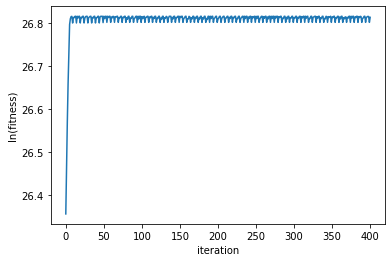

In [49]:
plt.plot(range(len(fitness_list)), fitness_list_log)
plt.xlabel("iteration")
plt.ylabel("ln(fitness)")